In [132]:
#all Modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math 

In [133]:
file_path = "C:\\Users\\Anjan Das\\Desktop\\programming\\python\\data_sets\\shoe_sales.csv"


df_shoe_sales = pd.read_csv(file_path)
print(f"File loaded ..\n {df_shoe_sales}")


File loaded ..
          date   brand  sold_qty
0    9/1/2023    Nike      24.0
1    9/1/2023  Adidas      14.0
2    9/2/2023    Nike      21.0
3    9/2/2023  Adidas      12.0
4    9/3/2023    Nike      18.0
5    9/3/2023  Adidas      11.0
6    9/4/2023    Nike      22.0
7    9/4/2023  Adidas      13.0
8    9/5/2023    Nike      20.0
9    9/5/2023  Adidas      10.0
10   9/6/2023    Nike      23.0
11   9/6/2023  Adidas      15.0
12   9/7/2023    Nike      19.0
13   9/7/2023  Adidas      16.0
14   9/8/2023    Nike      17.0
15   9/8/2023  Adidas       8.0
16   9/9/2023    Nike      25.0
17   9/9/2023  Adidas      17.0
18  9/10/2023    Nike      14.0
19  9/10/2023  Adidas       7.0
20  9/11/2023    Nike      23.0
21  9/11/2023  Adidas       9.0
22  9/12/2023    Nike      19.0
23  9/12/2023  Adidas     689.0
24  9/13/2023    Nike      16.0
25  9/13/2023  Adidas      11.0
26  9/14/2023    Nike      22.0
27  9/14/2023  Adidas      13.0
28  9/15/2023    Nike      17.0
29  9/15/2023  Adidas   

In [134]:
#info about the data set
print(df_shoe_sales.info())
print("-------------------------------")
print(df_shoe_sales.shape)

print(df_shoe_sales.columns)

print(df_shoe_sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      60 non-null     object 
 1   brand     60 non-null     object 
 2   sold_qty  58 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.5+ KB
None
-------------------------------
(60, 3)
Index(['date', 'brand', 'sold_qty'], dtype='object')
       date   brand  sold_qty
0  9/1/2023    Nike      24.0
1  9/1/2023  Adidas      14.0
2  9/2/2023    Nike      21.0
3  9/2/2023  Adidas      12.0
4  9/3/2023    Nike      18.0


In [135]:
#as we can see that the sold_qty have 2 Null value 
#then we must replace with with some one


#fill the column with the avg sale
df_shoe_sales['sold_qty'] = df_shoe_sales['sold_qty'].fillna(math.floor(df_shoe_sales['sold_qty'].mean()))
print(f"Not Null conut :{df_shoe_sales['sold_qty'].notnull().sum()}")


Not Null conut :60


In [136]:
#statistics info 
print(df_shoe_sales.describe())

"""""25%     12.250000
50%     16.000000
75%     19.750000"""

#its says that 25% of the sold quantity is less than 12.50 number

print("Most sales brand price ")
print(df_shoe_sales['sold_qty'].median())


         sold_qty
count   60.000000
mean    27.466667
std     87.006617
min      7.000000
25%     12.750000
50%     16.000000
75%     20.250000
max    689.000000
Most sales brand price 
16.0


In [137]:
#Lets do brand  specific analysis
#Nike analysis

df_nike = df_shoe_sales[df_shoe_sales['brand'] == "Nike"]
#print(df_nike)
print(df_nike.describe())





        sold_qty
count  30.000000
mean   20.133333
std     3.540245
min    14.000000
25%    17.250000
50%    20.000000
75%    22.750000
max    27.000000


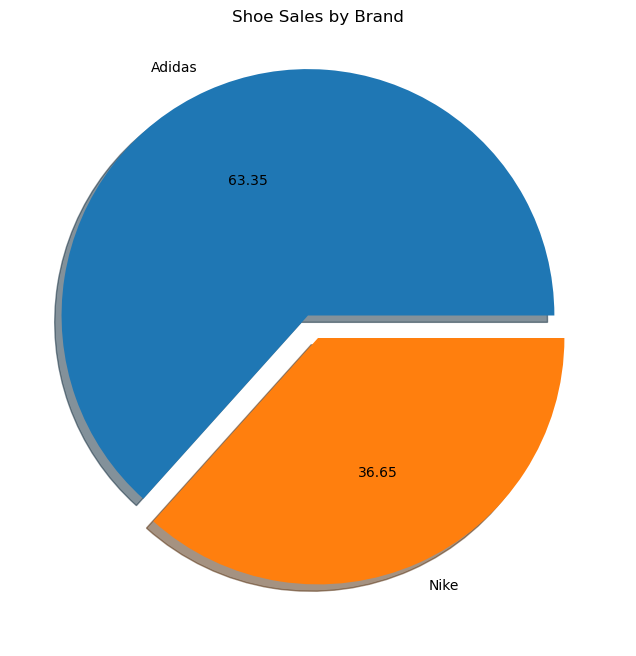

In [138]:

#Group the sold_qty by brand
grouped = df_shoe_sales.groupby('brand')['sold_qty'].sum()

# Prepare values and labels
values = grouped.values 
labels = grouped.index #index is the name of the brand

# explode the largest slice




# Plot the pie chart

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%.2f', explode=(0.1,0), shadow=True)
plt.title('Shoe Sales by Brand')
plt.show()



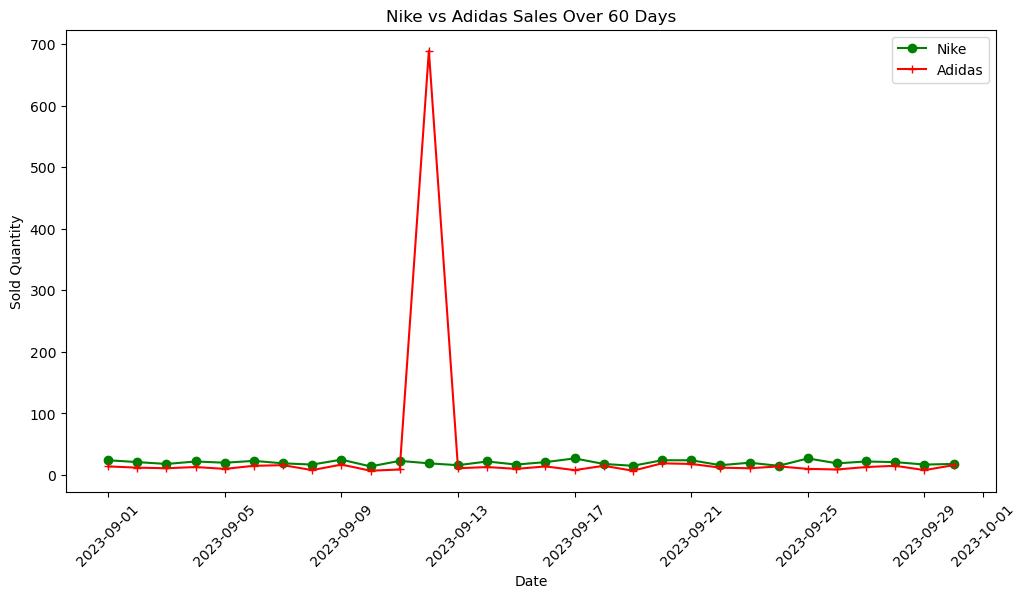

In [145]:
# Convert to datetime once
df_shoe_sales['date'] = pd.to_datetime(df_shoe_sales['date'])



 # Filter data for Nike and Adidas
nike_data = df_shoe_sales[df_shoe_sales['brand'] == "Nike"]
adidas_data = df_shoe_sales[df_shoe_sales['brand'] == "Adidas"]

   

    # Plot
plt.figure(figsize=(12, 6))
plt.plot(nike_data['date'], nike_data['sold_qty'] ,marker ='o' ,label='Nike', color='green')
plt.plot(adidas_data['date'], adidas_data['sold_qty'],marker ='+' ,label='Adidas', color='red')

plt.xlabel('Date')
plt.ylabel('Sold Quantity')
plt.title('Nike vs Adidas Sales Over 60 Days')
plt.legend()
plt.xticks(rotation=45)


plt.show()



Outliers:
23    34.8
Name: sold_qty, dtype: float64


C:\Users\Anjan Das\AppData\Local\Temp\ipykernel_19792\1803831490.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adidas_data['sold_qty'][23] = adidas_data['sold_qty'].mean()


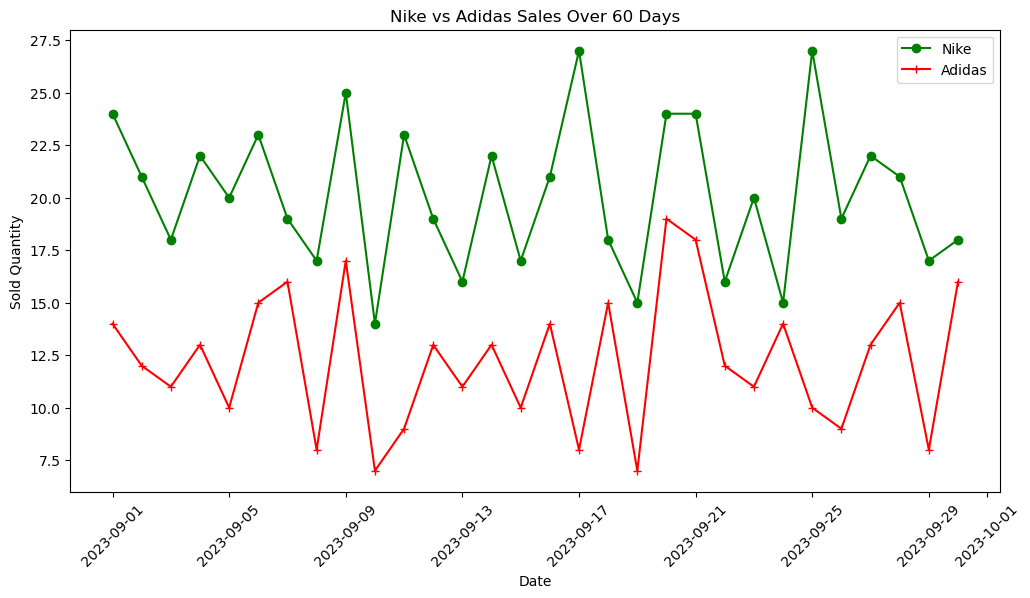

In [147]:
# IQR Method
# Calculate Q1, Q3, and IQR for Adidas
brand_data = adidas_data['sold_qty']
Q1 = brand_data.quantile(0.25)
Q3 = brand_data.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = brand_data[(brand_data < lower_bound) | (brand_data > upper_bound)]

print(f"Outliers:\n{outliers}")

# Replace outlier with the mean using .loc to avoid chained assignment
adidas_data['sold_qty'][23] = adidas_data['sold_qty'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(nike_data['date'], nike_data['sold_qty'], marker='o', label='Nike', color='green')
plt.plot(adidas_data['date'], adidas_data['sold_qty'], marker='+', label='Adidas', color='red')

plt.xlabel('Date')
plt.ylabel('Sold Quantity')
plt.title('Nike vs Adidas Sales Over 60 Days')
plt.legend()
plt.xticks(rotation=45)

plt.show()
